In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
df = pd.read_csv('/home/tang/Documents/DSBA/ML/sarcasm/sarcasm_data_preprocessed.csv')
df.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment,clean_com,clean_parent_com
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ...",nc and nh .,"yeah , i get that argument . at this point , i..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...,you do know west team play against west team m...,the blazer and maverick ( the west < NUM > and...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.,"they were underdog earlier today , but since g...",they 're favored to win .
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz,this meme is n't funny none of the `` new york...,deadass do n't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...,i could use one of those tool .,yep can confirm i saw the tool they use for th...


In [2]:
df = df[['label', 'subreddit', 'score', 'ups', 'downs', 'clean_com', 'clean_parent_com']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010771 entries, 0 to 1010770
Data columns (total 7 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   label             1010771 non-null  int64 
 1   subreddit         1010771 non-null  object
 2   score             1010771 non-null  int64 
 3   ups               1010771 non-null  int64 
 4   downs             1010771 non-null  int64 
 5   clean_com         1010765 non-null  object
 6   clean_parent_com  1010769 non-null  object
dtypes: int64(4), object(3)
memory usage: 54.0+ MB


In [3]:
df = df.dropna(subset=['clean_com'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1010765 entries, 0 to 1010770
Data columns (total 7 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   label             1010765 non-null  int64 
 1   subreddit         1010765 non-null  object
 2   score             1010765 non-null  int64 
 3   ups               1010765 non-null  int64 
 4   downs             1010765 non-null  int64 
 5   clean_com         1010765 non-null  object
 6   clean_parent_com  1010763 non-null  object
dtypes: int64(4), object(3)
memory usage: 61.7+ MB


In [4]:
X = df['clean_com']
y = df['label']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [6]:
pipeline = Pipeline([
    ("vecto", TfidfVectorizer(max_features=10000)),
    ("lr", LogisticRegression(solver='saga', max_iter=1000))
])

In [7]:
param_grid = {
    'lr__C': [0.01, 0.1, 1.0],
    'lr__penalty': ['l1', 'l2']
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    scoring='accuracy',
    cv=5,                 
    n_jobs=-1,            
    verbose=1
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vecto',
                                        TfidfVectorizer(max_features=10000)),
                                       ('lr',
                                        LogisticRegression(max_iter=1000,
                                                           solver='saga'))]),
             n_jobs=-1,
             param_grid={'lr__C': [0.01, 0.1, 1.0],
                         'lr__penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=1)

In [8]:
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

y_pred = best_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Best Parameters: {'lr__C': 1.0, 'lr__penalty': 'l1'}
Accuracy: 0.6883993806671185
              precision    recall  f1-score   support

           0       0.67      0.73      0.70    101080
           1       0.71      0.65      0.67    101073

    accuracy                           0.69    202153
   macro avg       0.69      0.69      0.69    202153
weighted avg       0.69      0.69      0.69    202153



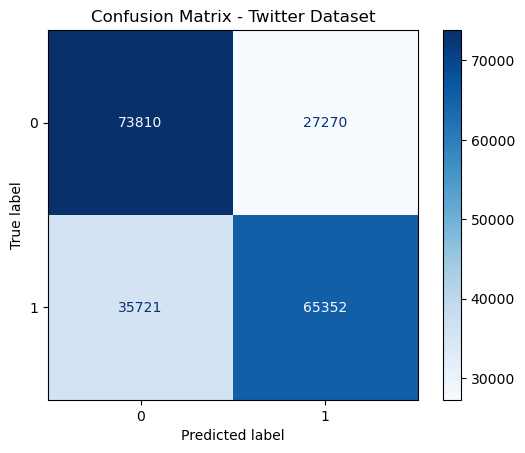

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

plt.title("Confusion Matrix - Twitter Dataset")
plt.show()